## Expectation-Maximization Algorithm

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})
np.random.seed(1)

In [2]:
def gaussian(x, mu, std):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(std, 2.))) / np.sqrt(2 * np.pi) / std

def loglikelihood_single_gaussian(X, mu, sig):
    N = X.shape[0]
    ll = - 1.* N / 2 * np.log(2 * np.pi * sig**2) - 1./ (2 * sig**2) * (X - mu).sum()
    return ll

In [3]:
# data preparation
X1 = np.random.normal(loc=170, scale=5, size=10000)
X2 = np.random.normal(loc=200, scale=15, size=20000)
X = np.concatenate((X1, X2))

<IPython.core.display.Javascript object>


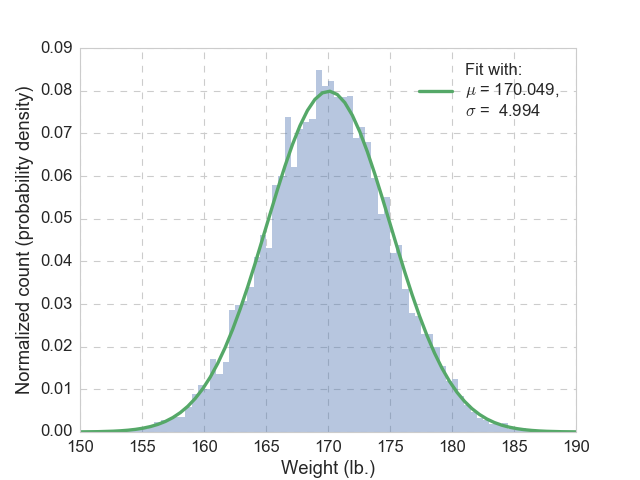

The mean and the std are 170.049,  4.994


In [4]:
plt.figure(0)
# make the histogram
ax = sns.distplot(X1,bins=np.arange(140,200,0.5), norm_hist=True, 
             kde=False, hist_kws={"linewidth": 0})
# plot the gaussian pdf
x = np.linspace(140, 260, 200)
mu, std = X1.mean(), X1.std()
y1 = gaussian(x=x, mu=mu, std=std)
ax.plot(x, y1, lw=3, label='Fit with: \n$\mu$ = {0:6.3f}, \n$\sigma$ = {1:6.3f}'.format(mu, std))
ax.set_xlabel('Weight (lb.)')
ax.set_ylabel('Normalized count (probability density)')
plt.xlim([150, 190])
plt.legend()
plt.show()
print('The mean and the std are {0:6.3f}, {1:6.3f}'.format(mu, std))

<IPython.core.display.Javascript object>


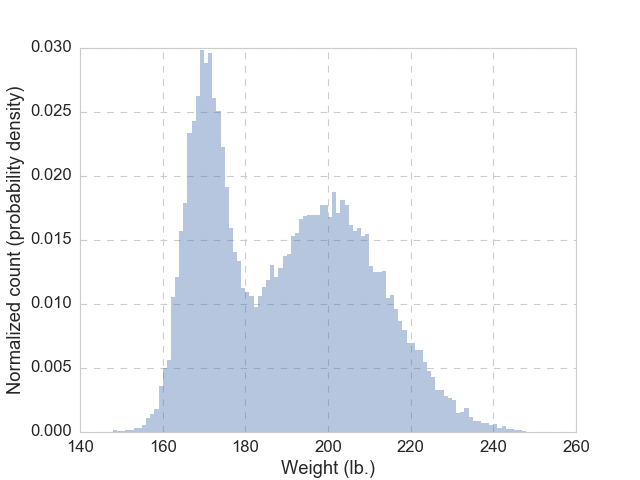

In [5]:
plt.figure(1)
# make the histogram
ax = sns.distplot(X,bins=np.arange(140,250,1), norm_hist=True,
             kde=False, hist_kws={"linewidth": 0})
# make the gaussian pdfs
# y2 = gaussian(x=x, mu=X2.mean(), sig=X2.std())
# y = 1./3 * y1 + 2./3 * y2
# plt.plot(x, 1./3 * y1, '--')
# plt.plot(x, 2./3 * y2, '--')
# plt.plot(x, y)
plt.xlim([140, 260])
ax.set_xlabel('Weight (lb.)')
ax.set_ylabel('Normalized count (probability density)')
plt.show()

## Gradient descent of single Gaussian distribution

In [6]:
## gradient descent
def gd_single_gaussian(X, mu_i, sig_i, maxiter=1e4, learning_rate=0.1):
    mu, var = mu_i, sig_i**2
    mus, vars_, lls = [], [], []
    N = X.shape[0]
    for i in range(int(maxiter)):
        ll = loglikelihood_single_gaussian(X, mu, np.sqrt(var))
        # manual learning rate override
        if ll > -38000:
            learning_rate = 0.01
        if ll > -27000:
            learning_rate = 0.001
        # calculate derivative
        d_mu = 1. / var * (X - mu).sum()
        d_var = - 1.*N / 2 / var + (np.square(X - mu)).sum() / 2 / var**2
        # update mu, var
        mu = mu + learning_rate * d_mu
        var = var + learning_rate * d_var
        
        if var < 0:
            raise Exception('var is negative: ', var)
        
        mus.append(mu)
        vars_.append(var)
        lls.append(ll)
        
    return mus, vars_, lls

mus, vars_, lls = gd_single_gaussian(X1, 150, 25)
print(mus[-1], vars_[-1])

170.048863283 24.9393290388


<IPython.core.display.Javascript object>


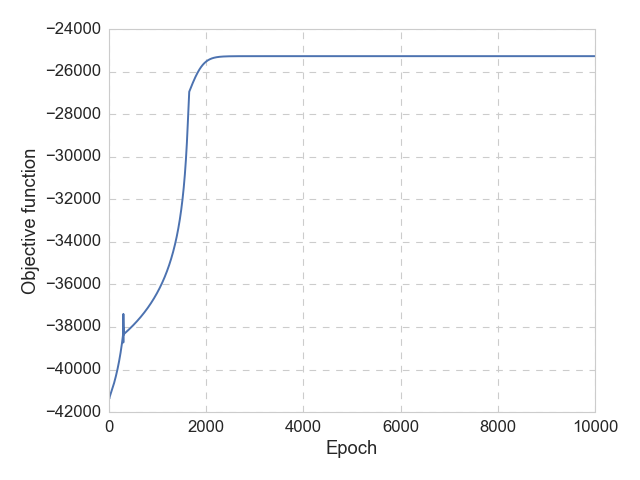

In [7]:
plt.figure(99)
plt.plot(lls)
plt.xlabel('Epoch')
plt.ylabel('Objective function')
plt.tight_layout()
plt.show()